#### **Stirling WorkShop**:



## Build, Train, and Deploy a Handwritten Digit Classifier

<img width=160 src="https://drive.google.com/uc?export=view&id=1u5KB1ZRk0uYXZHIepMtnsVgcpROyIFJ0"/>
<img src="https://app.piratepx.com/ship?p=6f6529da-9ed0-4188-a602-070f75691c96&i=qtf-free-lesson-mnist"/>

**Table of Contents**

1. [Setup](#setup)
2. [Prepare the Data](#prepare)
3. [Build the Model](#build)
4. [Train the Model](#train)
5. [Evaluate the Model](#evaluate)
6. [Export to TensorFlow Lite](#export)
7. [Deploy with PalletML](#deploy)

## Setup <a name="setup"></a>

Import TensorFlow and supporting libraries.

In [2]:
import tensorflow as tf # an end-to-end machine learning platform that help us to implement ,train and test our models easily
import numpy as np # The fundamental package for scientific computing with Python that helps us to use mathematical functions easily in python
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations in Python



ModuleNotFoundError: No module named 'tensorflow'

---

## Prepare the data <a name="prepare"></a>

Load the MNIST dataset from the built-in Keras [datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module, then **preprocess** the data by converting the samples from integers to floating-point numbers and scaling the pixel values to a range of 0 to 1.

Keras is a high-level API for TensorFlow that enables developers to rapidly build, train, and iterate on machine learning models for various tasks.

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

print()
print('Image shape:', x_train.shape[1:])
print(x_train.shape[0], "Train samples")
print(x_test.shape[0], "Test samples")


Image shape: (28, 28, 1)
60000 Train samples
10000 Test samples


Let's look at a sample image and label from the training dataset.

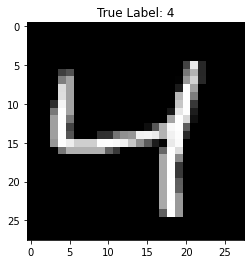

In [8]:
sample_index =2  # try from 0 to 60000-1
sample_image, sample_label = x_train[sample_index], y_train[sample_index]

#plt.subplot(1, 1, 1)
#plt.axis('off')
plt.title('True Label: {}'.format(sample_label))
plt.imshow(sample_image.reshape(28, 28), cmap=plt.cm.gray)

## Build the model <a name="build"></a>

Here we build a simple **[convolutional neural network](https://developers.google.com/machine-learning/glossary#convolutional-layer) (CNN)** that takes an image of size 28x28 as input, and outputs a list of 10 **predictions**, each representing a confidence that the input image contains the number corresponding to the index of the prediction in the list.

Note that because the MNIST dataset is *grayscale*, the images only have 1 color channel.

In [2]:
img_shape = (28, 28, 1) # height x width x channels
num_classes = 10

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='', input_shape=img_shape ),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='')
     ])

NameError: name 'tf' is not defined

We then configure the model with a cross entropy **loss function** that works for scalar `y` values (instead of [one-hot encoded](https://developers.google.com/machine-learning/glossary#one-hot-encoding) values), and a standard **optimization algorithm**.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=["accuracy"])

## Train the model <a name="train"></a>

We train the model using `Model.fit`, which iterates over the 60k training images in batches of 128, **learning** the features of the data, and adjusting the model parameters to minimize loss. Each iteration over the dataset during training is called an *epoch*, and here we train our model for 5 epochs.



In [ ]:
model.fit(x_train, y_train, batch_size=, epochs=, verbose=)

After just 5 epochs your model is over **98% accurate** in classifying images from the training dataset! Now let's test it on images it hasn't seen.

---

## Evaluate the trained model <a name="evaluate"></a>

Use the **test set** to evaluate your model on data it's never seen. This is the best way to accurately judge its predictive power.

In [ ]:
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Show a sample prediction

In [ ]:
test_index = 10 # try from 0 to 10000-1
test_image, test_label = x_test[test_index], y_test[test_index]

# Models work with batches of data, so add an extra dimension to the test image
# and make a prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)
color = 'green' if predicted_label == test_label else 'red'


plt.title('Prediction: {}, True: {}'.format(predicted_label, test_label), color=color)
plt.imshow(test_image.reshape(28, 28), cmap=plt.cm.gray)

# **Now it is time for magic 🥰**

## Export the model to TensorFlow Lite <a name="export"></a>

In order to deploy your model to a mobile device, we need to convert it to a **TensorFlow Lite** model and export it as a file.  

We also need to export a set of labels corresponding to the numerical output of our model so the mobile app knows how to display the result.

Save the TensorFlow Lite model as binary file with a conventional `.tflite` extension

In [ ]:
model.save('mnist_model')
!tflite_convert --saved_model_dir=mnist_model --output_file=mnist_model.tflite

Save the labels as a plain text file, one label per row.

In [ ]:
labels = list('0123456789')
with open('mnist_labels.txt', 'w') as f:
    for label in labels[:-1]:
        f.write(label + '\n')
    f.write(labels[-1])

#### Download the model and labels

Now download your model (`mnist_model.tflite`) and labels (`mnist_labels.txt`) from the **Files** pane on the left:
* To download a file, *right-click* on the name of the file in the pane and select *Download*. (See [this answer](https://stackoverflow.com/questions/48774285/how-to-download-file-created-in-colaboratory-workspace/53860114#53860114) for more details)

---

## Deploy the model with PalletML <a name="deploy"></a>

PalletML is a no-code platform that turns image classification models into mobile apps. You can learn more about it on the [website](http://palletml.com). (Currently supports Android, iOS coming soon).

Let's use Pallet to deploy your model as a shareable app:

1. **Install Pallet** from the Google Play Store

    <a href="https://play.google.com/store/apps/details?id=com.palletml.app"><img width=180 src="https://drive.google.com/uc?export=view&id=1Vbb_TAvaTJFZ8kBIA6kk-NpcF6y1ECZY"/></a>

    and **Sign Up** to create a new account

    <img width=240 src="https://drive.google.com/uc?export=view&id=1STRSC9feaSmSQfsvD3rsG8Mf__9gDC2M"/>

2. **In your computer browser**, **visit [app.palletml.com](http://app.palletml.com)** in a new tab and **Log In** to the account you just created.

    <img width=720 src="https://drive.google.com/uc?export=view&id=1YHv2gYQn7eF8U2x-42ZZhDhf_-yZcoG7"/>

3. Every model you deploy with Pallet belongs to a Project. **Create a New Project** for your model.

    <img width=720 src="https://drive.google.com/uc?export=view&id=1SJzGrI0xGDfBkHQfyET1W3S7A5NHV3qd"/>

4. **Choose a name** for your project and click **Create**.

    <img width=720 src="https://drive.google.com/uc?export=view&id=12WLce4m-Jzf14tk5Enfh_CqjO75M0bR5"/>

5. **Browse** or **Drag & Drop** your model and labels, then click **Upload**.

    <img width=720 src="https://drive.google.com/uc?export=view&id=16Nm8Js3bJ05BNhir9MBspKFgJdE2kfz9"/>
    <img width=720 src="https://drive.google.com/uc?export=view&id=1T3tWSMoL5ueYMpCW-8GVpYiq-QMeSuf4"/>
    
    Once the upload finishes, your model has been deployed ✅.

6. **Return** to the **Pallet app**, navigate to your **Profile 👤**, and **pull to refresh** your list of Projects.

    Your new Project will appear. ✨
    
    <img width=230 src="https://drive.google.com/uc?export=view&id=1wzyx1-ZmjDBB7nrTUOZtbtdoKFdEAJ-5"/>

7. With Pallet, most image classification models work out of the box, but in this case we need to configure your Project to **preprocess** input images according to your model's expectations: with **inversion** and **grayscale**. 

    **Tap** your Project to open a detailed view. 

    Then **tap** the **Edit** icon to access Project **Settings**.

    <img width=240 src="https://drive.google.com/uc?export=view&id=1WDIiM2i7laAqnN7aSwQw1wc1a8GYTcsV"/>

8. Under *Input Settings*:

    Toggle the **Invert Colors** switch to **On**.

    Toggle the **Grayscale** switch to **On**.

    <img width=240 src="https://drive.google.com/uc?export=view&id=1pLuro6ADZDWxvZkJVeVvmd8DA80L4l95"/>    

9. Tap **Update** to save these settings. 

    <img width=240 src="https://drive.google.com/uc?export=view&id=1PYE2SwyXS9o_HtUanfLWOPaAMo1rXo4u"/>    

10. Now **Launch** your app 🚀

    Test drive your model by **Drawing** different digits to see how well it performs.
    
    <span>(For best results, leave a little space around the sides, just like the images your model was trained on&nbsp;&nbsp;<img width=28 src="https://drive.google.com/uc?export=view&id=1RBp8RH0c1NO-hc2vkkcoJuHrm6yiGU67"/>)</span>

    <img width=220 src="https://drive.google.com/uc?export=view&id=14iwWXap4SlfH-9NABzYLUj70UFxSmYH5"/>  